This project analyzes the job dissatisfaction based on job exit survey reported from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia. 

In [1]:
cd Raw_data

C:\Users\Xueho\Projects\Python_projects\Raw_data


In [161]:
import pandas as pd
import numpy as np
dete_survey = pd.read_csv('dete_survey2014.csv', na_values = 'Not Stated')
tafe_survey = pd.read_csv('tafe_survey2013.csv', encoding = 'unicode_escape')
print(dete_survey.shape)
print(tafe_survey.shape)

(822, 56)
(702, 72)


#### Drop Unnecessary Columns

In [162]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)
print(dete_survey_updated.shape)
print(tafe_survey_updated.shape)

(822, 35)
(702, 23)


In [163]:
dete_survey.head(2)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [164]:
tafe_survey.head(2)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26  30,Temporary Full-time,Administration (AO),2-Jan,2-Jan
1,6.341340e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


#### Clean Column Names

In [165]:
# clean names in dete_survey_updated (using lower letter and replace spaces with '_')
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.rstrip().str.replace(' ', '_')

# rename names in tafe_survey_updated
colmap={
    'Record ID':'id',
    'CESSATION YEAR':'cease_date',
    'Reason for ceasing employment':'separationtype',
    'Gender. What is your Gender?':'gender',
    'CurrentAge.     Current Age':'age',
    'Employment Type. Employment Type':'employment_status',
    'Classification. Classification':'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)':'institute_service'
}
tafe_survey_updated.rename(columns=colmap, inplace=True)

In [166]:
dete_survey_updated.head(2)

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN


In [167]:
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,institute_service,LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26  30,Temporary Full-time,Administration (AO),2-Jan,2-Jan
1,6.341340e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


In [168]:
#checking dete_survey_updated data
d = dete_survey_updated['separationtype'].value_counts(dropna=False)
t = tafe_survey_updated['separationtype'].value_counts(dropna=False)
print(d, '\n')
print(t)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64 

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64


#### Select Resignation Type to Learn About Job Disatisfaction 

In [169]:
sel= dete_survey_updated['separationtype'].str.contains('Resignation')
dete_resignations = dete_survey_updated[sel]
dete_resignations['separationtype'].isnull().value_counts()

False    311
Name: separationtype, dtype: int64

In [170]:
sel= tafe_survey_updated['separationtype']=='Resignation'
tafe_resignations = tafe_survey_updated[sel]
tafe_resignations['separationtype'].isnull().value_counts()

False    340
Name: separationtype, dtype: int64

In [171]:
print(dete_resignations.shape)
print(tafe_resignations.shape)
dete_resignations['cease_date'].value_counts(dropna=False)

(311, 35)
(340, 23)


2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
2010         1
07/2006      1
07/2012      1
Name: cease_date, dtype: int64

#### Verify the Dates

In [172]:
# clean dete_resignations['cease_date']
a = dete_resignations['cease_date'].str.split('/').str[-1]
dete_resignations.loc[:,'cease_date'] = a.astype(float)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:480: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [173]:
dete_resignations['cease_date'].value_counts(dropna=False,ascending= True)

2006.0      1
2010.0      2
NaN        11
2014.0     22
2012.0    129
2013.0    146
Name: cease_date, dtype: int64

In [174]:
tafe_resignations['cease_date'].value_counts( ascending= True)

2009.0      2
2013.0     55
2010.0     68
2012.0     94
2011.0    116
Name: cease_date, dtype: int64

#### Create a New institute_service Column

In [175]:
date1 = dete_resignations['cease_date']
date2 = dete_resignations['dete_start_date']
dete_resignations.loc[:, 'institute_service'] = date1- date2

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)


In [176]:
print(dete_resignations['institute_service'].value_counts(dropna=False))

NaN     38
5.0     23
1.0     22
3.0     20
0.0     20
6.0     17
4.0     16
9.0     14
2.0     14
7.0     13
13.0     8
8.0      8
20.0     7
15.0     7
12.0     6
22.0     6
17.0     6
10.0     6
14.0     6
16.0     5
18.0     5
24.0     4
23.0     4
11.0     4
39.0     3
32.0     3
19.0     3
21.0     3
36.0     2
30.0     2
25.0     2
28.0     2
26.0     2
29.0     1
42.0     1
38.0     1
27.0     1
41.0     1
35.0     1
49.0     1
34.0     1
33.0     1
31.0     1
Name: institute_service, dtype: int64


In [177]:
print(tafe_resignations['institute_service'].value_counts(dropna=False))

Less than 1 year      73
2-Jan                 64
4-Mar                 63
NaN                   50
6-May                 33
20-Nov                26
10-Jul                21
More than 20 years    10
Name: institute_service, dtype: int64


#### Identify Dissatisfied Employees

In [178]:
a= tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts()
b= tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts()
print(a)
print(b)

-                                         277
Contributing Factors. Dissatisfaction      55
Name: Contributing Factors. Dissatisfaction, dtype: int64
-                      270
Job Dissatisfaction     62
Name: Contributing Factors. Job Dissatisfaction, dtype: int64


In [179]:
def update_vals(s):
    """
    Convert the values in the 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' 
    columns in the tafe_resignations dataframe to True, False, or NaN values. 
    """
    
    if pd.isnull(s):
        return np.nan
    elif s == '-':
        return False
    else:
        return True
    
tc = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]
tc = tc.applymap(update_vals)

# create new coloumn, tafe_resignations['dissatisfied']
tafe_resignations.loc[:,'dissatisfied'] = tc.any(axis=1, skipna=False)
tafe_resignations_up = dete_resignations.copy()
tafe_resignations['dissatisfied'].value_counts(dropna=False)
tafe_resignations_up = tafe_resignations.copy()
tafe_resignations_up['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [180]:
dete_resignations.columns
dc = dete_resignations[['job_dissatisfaction',
    'dissatisfaction_with_the_department',
    'physical_work_environment',
    'lack_of_recognition',
    'lack_of_job_security',
    'work_location',
    'employment_conditions',
    'work_life_balance',
    'workload']]
dc = dc.applymap(update_vals)
dete_resignations.loc[:, 'dissatisfied'] = dc.any(axis=1, skipna = False)
dete_resignations_up = dete_resignations.copy()
dete_resignations_up['dissatisfied'].value_counts(dropna = False)

True    311
Name: dissatisfied, dtype: int64

#### Combine the Data and  Clean the Service Column
Because institute_service columns in the two data sets have differnt format, need to categorize them using different functions

In [181]:
# categorize data for dete_resignations['institute_service']

def cat(x):
    if pd.isnull(x):
        return np.nan
    elif x <= 3:
        return 'New'
    elif x <= 6:
        return 'Experienced'
    elif x <= 10:
        return 'Established'
    elif x >= 11:
        return 'Veteran'
dete_resignations_up['service_cat'] = dete_resignations_up['institute_service'].apply(cat)
dete_resignations_up['service_cat'].value_counts()

Veteran        100
New             76
Experienced     56
Established     41
Name: service_cat, dtype: int64

In [182]:
tafe_resignations_up['institute_service'].value_counts()

Less than 1 year      73
2-Jan                 64
4-Mar                 63
6-May                 33
20-Nov                26
10-Jul                21
More than 20 years    10
Name: institute_service, dtype: int64

In [183]:
# categorize data for tafe_resignations['institute_service']
def cat(x):
    if pd.isnull(x):
        return np.nan
    elif (x == 'Less than 1 year') or (x == '2-Jan'):
        return 'New'
    elif (x == '4-Mar') or (x == '6-May'):
        return 'Experienced'
    elif x == '10-Jul':
        return 'Established'
    elif (x == '20-Nov') or (x == 'More than 20 years'):
        return 'Veteran'
tafe_resignations_up['service_cat'] = tafe_resignations_up['institute_service'].apply(cat)
tafe_resignations_up['service_cat'].value_counts(dropna=False)

New            137
Experienced     96
NaN             50
Veteran         36
Established     21
Name: service_cat, dtype: int64

In [184]:
dete_resignations_up['institute'] = 'DETE'
tafe_resignations_up['institute'] = 'TAFE'
combined = pd.concat([dete_resignations_up, tafe_resignations_up], axis=0)
combined_updated = combined.dropna(thresh = 500, axis=1)
combined_updated['service_cat'].value_counts(dropna=False)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  This is separate from the ipykernel package so we can avoid doing imports until


New            213
Experienced    152
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

In [185]:
combined_updated['institute'].value_counts(dropna = False)

TAFE    340
DETE    311
Name: institute, dtype: int64

In [186]:
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

In [187]:
# drop any columns with less than 500 non null values
combined_updated = combined.dropna(thresh = 300, axis = 1)
combined_updated.head(2)

,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Dissatisfaction,Contributing Factors. Ill Health,Contributing Factors. Interpersonal Conflict,Contributing Factors. Job Dissatisfaction,Contributing Factors. Maternity/Family,Contributing Factors. NONE,Contributing Factors. Other,...,physical_work_environment,position,relocation,separationtype,service_cat,study/travel,traumatic_incident,work_life_balance,work_location,workload
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,Teacher,False,Resignation-Other reasons,Established,False,False,False,False,False
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,False,Guidance Officer,False,Resignation-Other reasons,Veteran,False,False,False,False,False


In [188]:
combined_updated['dissatisfied'].fillna(True)
combined_updated['service_cat'].value_counts(dropna=False)
combined_updated['dissatisfied'].value_counts(dropna=False)

True     402
False    241
NaN        8
Name: dissatisfied, dtype: int64

### 9. Perform Initial Analysis

In [189]:
combined_updated['dissatisfied'].mean()

0.6251944012441679

In [190]:
group = combined_updated.groupby('service_cat')
group['dissatisfied'].sum()
# .mean() function generated error for the group object

service_cat
Established     48
Experienced     80
New            112
Veteran        110
Name: dissatisfied, dtype: int64

In [191]:
pivot_sum = combined_updated.pivot_table(values=['dissatisfied'], \
                             index=['service_cat'],aggfunc =np.sum,\
                             dropna=True, margins=True)
pivot_sum


,dissatisfied
service_cat,
Established,48
Experienced,80
New,112
Veteran,110
All,350


In [192]:
percent = pivot_sum / pivot_sum.loc['All'] *100
print(percent)

             dissatisfied
service_cat              
Established     13.714286
Experienced     22.857143
New             32.000000
Veteran         31.428571
All            100.000000


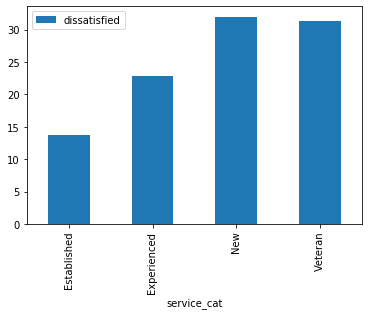

In [193]:
%matplotlib inline
percent[0:4].plot(kind='bar', y='dissatisfied')

In [194]:
combined_updated['age'].value_counts(dropna=False)

NaN              345
41-45             48
46-50             42
36-40             41
26-30             35
51-55             32
21-25             29
31-35             29
56-60             26
61 or older       23
20 or younger      1
Name: age, dtype: int64

In [195]:
def age_cat(x):
    if pd.isnull(x):
        return np.nan
    elif x[0]== '2':
        return '20-30'
    elif x[0]== '3':
        return '30-40'
    elif x[0]== '4':
        return '40-50'
    elif x[0]== '5':
        return '50 & older'
combined_updated['age'] = combined_updated['age'].apply(age_cat)
combined_updated['age'].value_counts()
   

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


40-50         90
30-40         70
20-30         65
50 & older    58
Name: age, dtype: int64

In [196]:
age_sum = combined_updated.pivot_table(values=['dissatisfied'], \
                             index=['age'],aggfunc =np.sum,\
                             dropna=True, margins=True)
age_sum


,dissatisfied
age,
20-30,65
30-40,70
40-50,90
50 & older,58
All,283


In [197]:
percent = age_sum / age_sum.loc['All'] *100
print(percent)

            dissatisfied
age                     
20-30          22.968198
30-40          24.734982
40-50          31.802120
50 & older     20.494700
All           100.000000


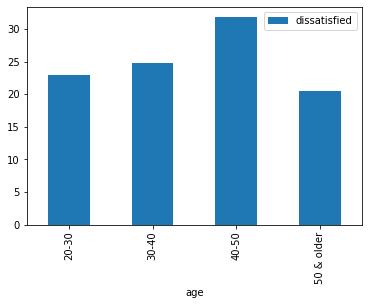

In [198]:
percent[0:4].plot(kind='bar', y='dissatisfied')